<a href="https://colab.research.google.com/github/CodeHombre/Deep-Learning-Projects/blob/main/CatsClassification_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2 as cv

In [ ]:
#loading the dataset
def load_dataset():
    with h5py.File('datasets/train_catvnoncat.h5', "r") as train_dataset:
        train_set_x_orig = np.array(train_dataset["train_set_x"][:])
        train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    with h5py.File('datasets/test_catvnoncat.h5', "r") as test_dataset:
        test_set_x_orig = np.array(test_dataset["test_set_x"][:])
        test_set_y_orig = np.array(test_dataset["test_set_y"][:])
        classes = np.array(test_dataset["list_classes"][:])

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
  
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes = load_dataset()

In [ ]:
#visualising the raw imported dataset
print(np.shape(train_set_x_orig))
print(np.shape(train_set_y_orig))
print(np.shape(test_set_x_orig))
print(np.shape(test_set_y_orig))

i=97
plt.imshow(train_set_x_orig[i])
print(train_set_y_orig[0,i])

In [ ]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
imgSize = train_set_x_orig.shape[1]

#print(m_train,m_test,imgSize)

#reshaping dataset
train_X = train_set_x_orig.reshape(m_train,-1).T
test_X = test_set_x_orig.reshape(m_test,-1).T
train_X = train_X/255
test_X = test_X/255

train_Y = train_set_y_orig
test_Y = test_set_y_orig

#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [ ]:
#initialising parameters 
def init_params():
  W = np.random.randn(1,train_X.shape[0])
  b = np.random.randn(1,1)

  return W,b

In [ ]:
#sigmoid activation function
def sigmoid(z):
  return 1/(1+np.exp(-z))


In [ ]:
#forward prop function
def forward_prop(X,W,b):
  Z = np.dot(W,X) + b
  A = sigmoid(Z)
  return A

In [ ]:
#backward prop function
def back_prop(A,Y,X,m):
  dZ = A-Y
  dW = np.dot(dZ,X.T)/m
  db = np.sum(dZ)/m
  return dW,db

In [ ]:
#update params
def update_params(W,b,dW,db,alpha):
  return W-alpha*dW, b-alpha*db

In [ ]:
#get cost 
def get_cost(A,Y,m):
  cost = -1/m*(np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))) 
  cost = np.squeeze(cost)
  assert(cost.shape == ())
  return cost

In [ ]:
#function to optimize W and b 
def optimize(m,X,Y,n_iter,alpha,W,b):
  for i in range(n_iter):
    A = forward_prop(X,W,b)
    cost = get_cost(A,Y,m) 
    dW,db = back_prop(A,Y,X,m)
    W,b = update_params(W,b,dW,db,alpha)
    #if(i%100==0):
      #print(cost)
  return W,b


In [ ]:
def model(m,X,Y,iterations,learning_rate):
  W,b = init_params()
  W,b = optimize(m,X,Y,iterations,learning_rate,W,b)
  return W,b

In [ ]:
def get_accuracy(A,Y,m):
  A_dash = np.zeros((A.shape[0],A.shape[1]), dtype=np.int8)

  for i in range(A.shape[1]):
    if A[0][i] > 0.5:
      A_dash[0][i]=1
  
  correct = np.sum(np.abs(Y-A_dash))
  accuracy = 100 - 1/m*(np.sum(np.abs(Y-A_dash)))*100
  #print(A_dash)
  return accuracy

In [ ]:
#testing for optimum learning rate
#lrs = [0.1, 0.01, 0.2, 0.02, 0.3, 0.03, 0.4, 0.5]
lrs = np.arange(0.01, 0.21, 0.01, dtype='float')
print(lrs)
test_acc = []
for lr in lrs:
  W,b = model(m_train, train_X, train_Y, 10000, lr)
  A_test = forward_prop(test_X, W, b)
  test_acc.append(get_accuracy(A_test, test_Y, m_test))

print(test_acc)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2 ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


[74.0, 56.0, 68.0, 56.0, 52.0, 58.0, 72.0, 64.0, 70.0, 60.0, 62.0, 70.0, 60.0, 56.0, 60.0, 62.0, 72.0, 68.0, 70.0, 68.0]


Max accuracy = 74.0at Learning rate = 0.01


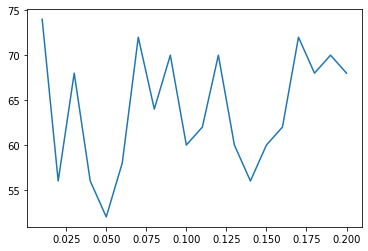

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.plot(lrs,test_acc)

max_acc = max(test_acc)
optimum_lr = lrs[test_acc.index(max_acc)]
print("Max accuracy = " + str(max_acc) + "at Learning rate = " + str(optimum_lr))

In [ ]:
#final model 
W_f, b_f = model(m_train,train_X,train_Y, 10000, optimum_lr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#train accuracy
A_train = forward_prop(train_X, W_f, b_f)
acc_train = get_accuracy(A_train, train_Y, m_train)
print("train accuracy = " + str(acc_train))

train accuracy = 100.0


In [ ]:
def predict(imgX):
  a = forward_prop(imgX, W_f, b_f)
  result = 1 if a>0.5 else 0
  print(result) 

In [ ]:
my_img = cv.imread("images/lala.png")
my_img = cv.resize(my_img, (64,64))
plt.imshow(my_img)
my_img = my_img.reshape(1,-1).T
predict(my_img)